In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

3

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [8]:
df.shape

(147, 5)

In [11]:
df['species'].value_counts()

species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

In [12]:
x = df.iloc[:,:-1]
# x = df.drop('label',axis=1)
# x = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df.iloc[:,-1]
# y = df['Species']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(147, 4)
(147,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


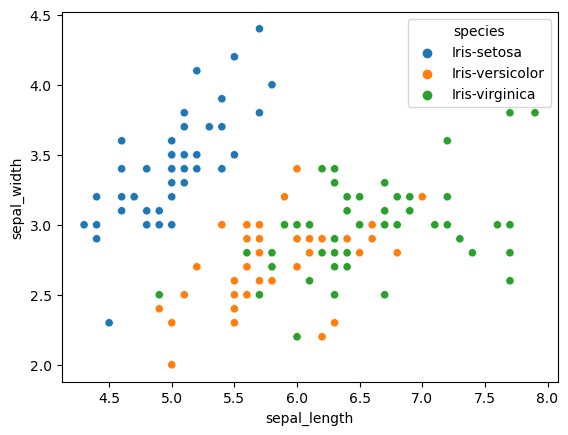

In [16]:
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],hue=df['species'])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(110, 4)
(37, 4)
(110,)
(37,)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
m1 = KNeighborsClassifier(n_neighbors=11)
m1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [25]:
print('Training score',m1.score(x_train,y_train))
print('Testing score',m1.score(x_test,y_test))

Training score 0.9818181818181818
Testing score 0.9459459459459459


In [26]:
ypred = m1.predict(x_test)
print(ypred)

['Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa']


In [27]:
from sklearn.metrics import confusion_matrix,classification_report

In [28]:
cm = confusion_matrix(y_test,ypred)
print(cm)
print(classification_report(y_test,ypred))

[[11  0  0]
 [ 0 12  2]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.86      1.00      0.92        12

       accuracy                           0.95        37
      macro avg       0.95      0.95      0.95        37
   weighted avg       0.95      0.95      0.95        37



In [29]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
41,4.5,2.3,1.3,0.3
126,6.2,2.8,4.8,1.8
149,5.9,3.0,5.1,1.8
46,5.1,3.8,1.6,0.2
98,5.1,2.5,3.0,1.1


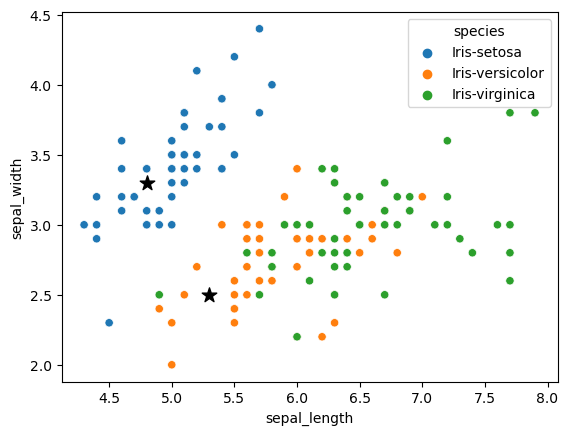

In [31]:
sns.scatterplot(x=df['sepal_length'],y=df['sepal_width'],hue=df['species'])
plt.scatter([4.8,5.3],[3.3,2.5],color='black',marker='*',s=120)
plt.show()